# Linear Regression Assignment

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

## Step 1: Reading and Understanding the data

In [2]:
bikes = pd.read_csv("day.csv")

In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.shape

(730, 16)

### Changing Data types 

In [5]:
bikes= bikes.astype({"season":object, "yr":object, "mnth":object, "weekday":object, "holiday":object, "workingday":object, "weathersit":object})
bikes.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dropping Unnecessary columns in the Bikes dataframe

In [6]:
bikes= bikes.drop(['instant','dteday','casual','registered'],axis=1)
bikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [7]:
bikes.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [8]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null object
mnth          730 non-null object
holiday       730 non-null object
weekday       730 non-null object
workingday    730 non-null object
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


## Step 2: Visualising the data

### Visualising Numeric Variables

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

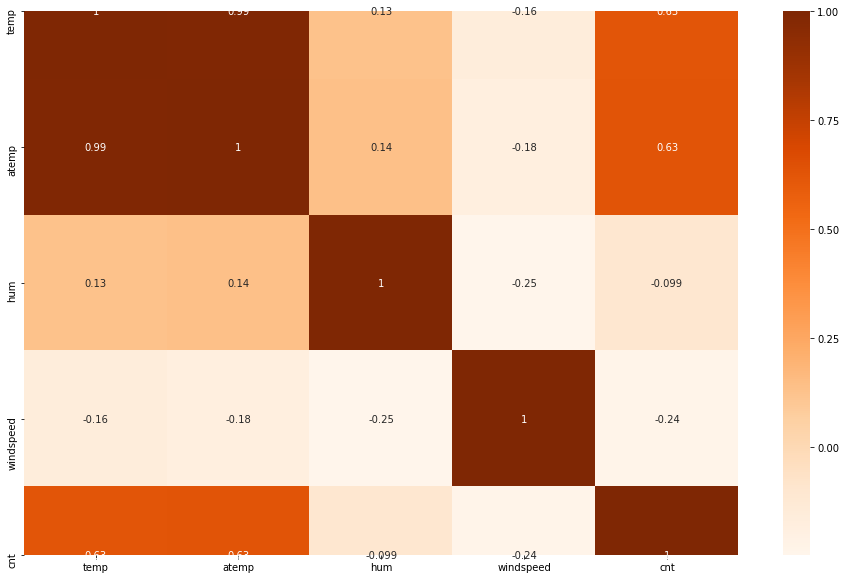

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(bikes.corr(),annot=True, cmap= 'Oranges')
plt.show()

### Visualising for Categorical variables 

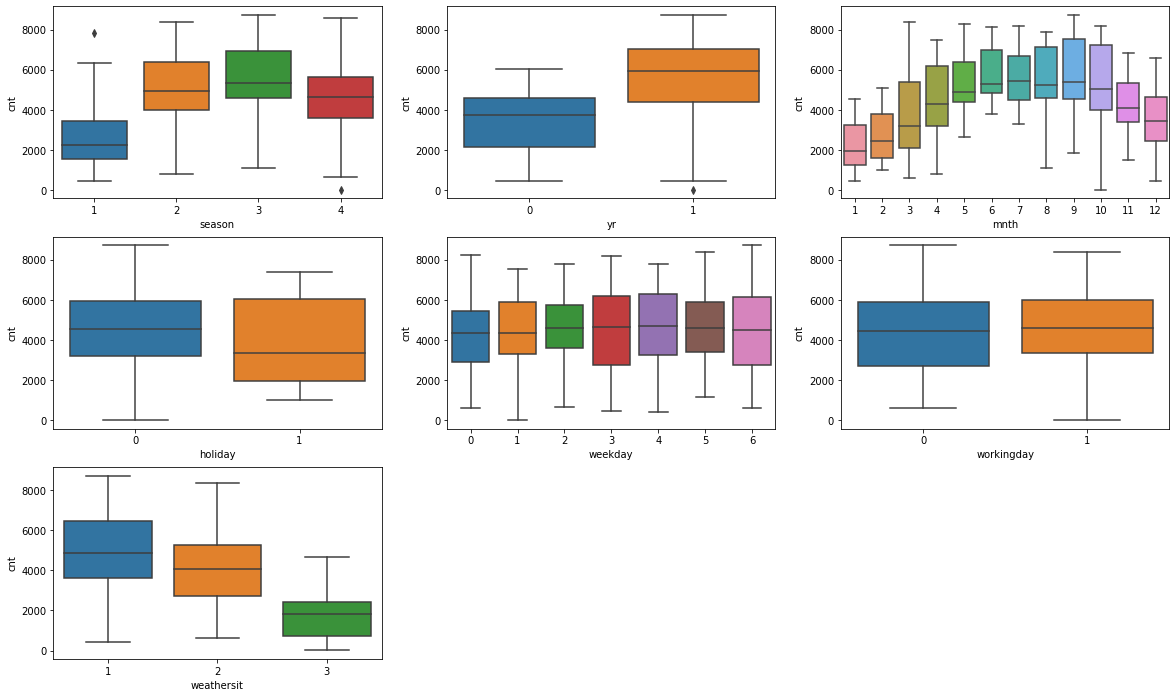

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

We are visualising some of the Categorical variables parallelly but using "HUE" argument.

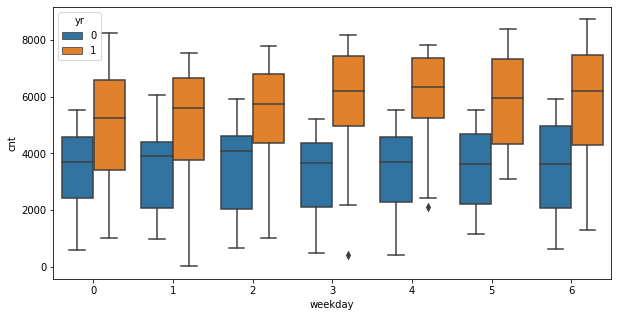

In [12]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'yr', data = bikes)
plt.show()

## Step:3 Data Preparation

In [13]:
bikes['weekday']=bikes['weekday'].apply(lambda x:{0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'}.get(x,x))
bikes['season']=bikes['season'].apply(lambda x:{1:'spring',2:'summer',3:'fall',4:'winter'}.get(x,x))
bikes['mnth']=bikes['mnth'].apply(lambda x:{1:'January',2:'Feburary',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August', 9:'September',10:'October',11:'November',12:'December '}.get(x,x))
bikes['weathersit']=bikes['weathersit'].apply(lambda x:{1:'Clear',2:'Mist',3:'Light_Snow',4:'Heavy_Rain'}.get(x,x))
bikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,thursday,1,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,December,0,friday,1,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,December,0,saturday,0,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,December,0,sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


### Dummy variables

In [14]:
status = pd.get_dummies(bikes['mnth'])
status.head()

,April,August,December,Feburary,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [15]:
status1 = pd.get_dummies(bikes['weekday'])
status1.head()

,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [16]:
status2 = pd.get_dummies(bikes['season'])
status2.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [17]:
status3 = pd.get_dummies(bikes['weathersit'])
status3.head()

,Clear,Light_Snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [18]:
bikes= bikes.drop(['mnth','weekday','weathersit','season'],axis=1)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
bikes=pd.concat([bikes,status,status1,status2,status3],axis=1)
bikes

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,April,August,...,thursday,tuesday,wednesday,fall,spring,summer,winter,Clear,Light_Snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,...,1,0,0,0,1,0,0,0,0,1
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,0,0,...,0,0,0,0,1,0,0,0,0,1
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,0,0,0,0,1,0,0,1,0,0


## Step:4 Splitting the Data into Training and Testing sets

In [20]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_test,df_train= train_test_split(bikes, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the Features

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler= MinMaxScaler()

In [23]:
num_vars= ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [24]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,April,August,...,thursday,tuesday,wednesday,fall,spring,summer,winter,Clear,Light_Snow,Mist
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,0,...,0,0,1,0,0,1,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,1,...,0,0,1,1,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,0,...,1,0,0,0,0,1,0,1,0,0


In [25]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,April,August,December,Feburary,January,...,thursday,tuesday,wednesday,fall,spring,summer,winter,Clear,Light_Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.546312,0.530942,0.508750,0.418870,0.516216,0.091324,0.059361,0.086758,0.100457,0.077626,...,0.164384,0.164384,0.100457,0.246575,0.255708,0.264840,0.232877,0.652968,0.027397,0.319635
std,0.249189,0.228159,0.201253,0.188111,0.238702,0.288730,0.236840,0.282125,0.301297,0.268194,...,0.371472,0.371472,0.301297,0.432005,0.437258,0.442259,0.423633,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759735,0.720622,0.651165,0.524362,0.682487,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


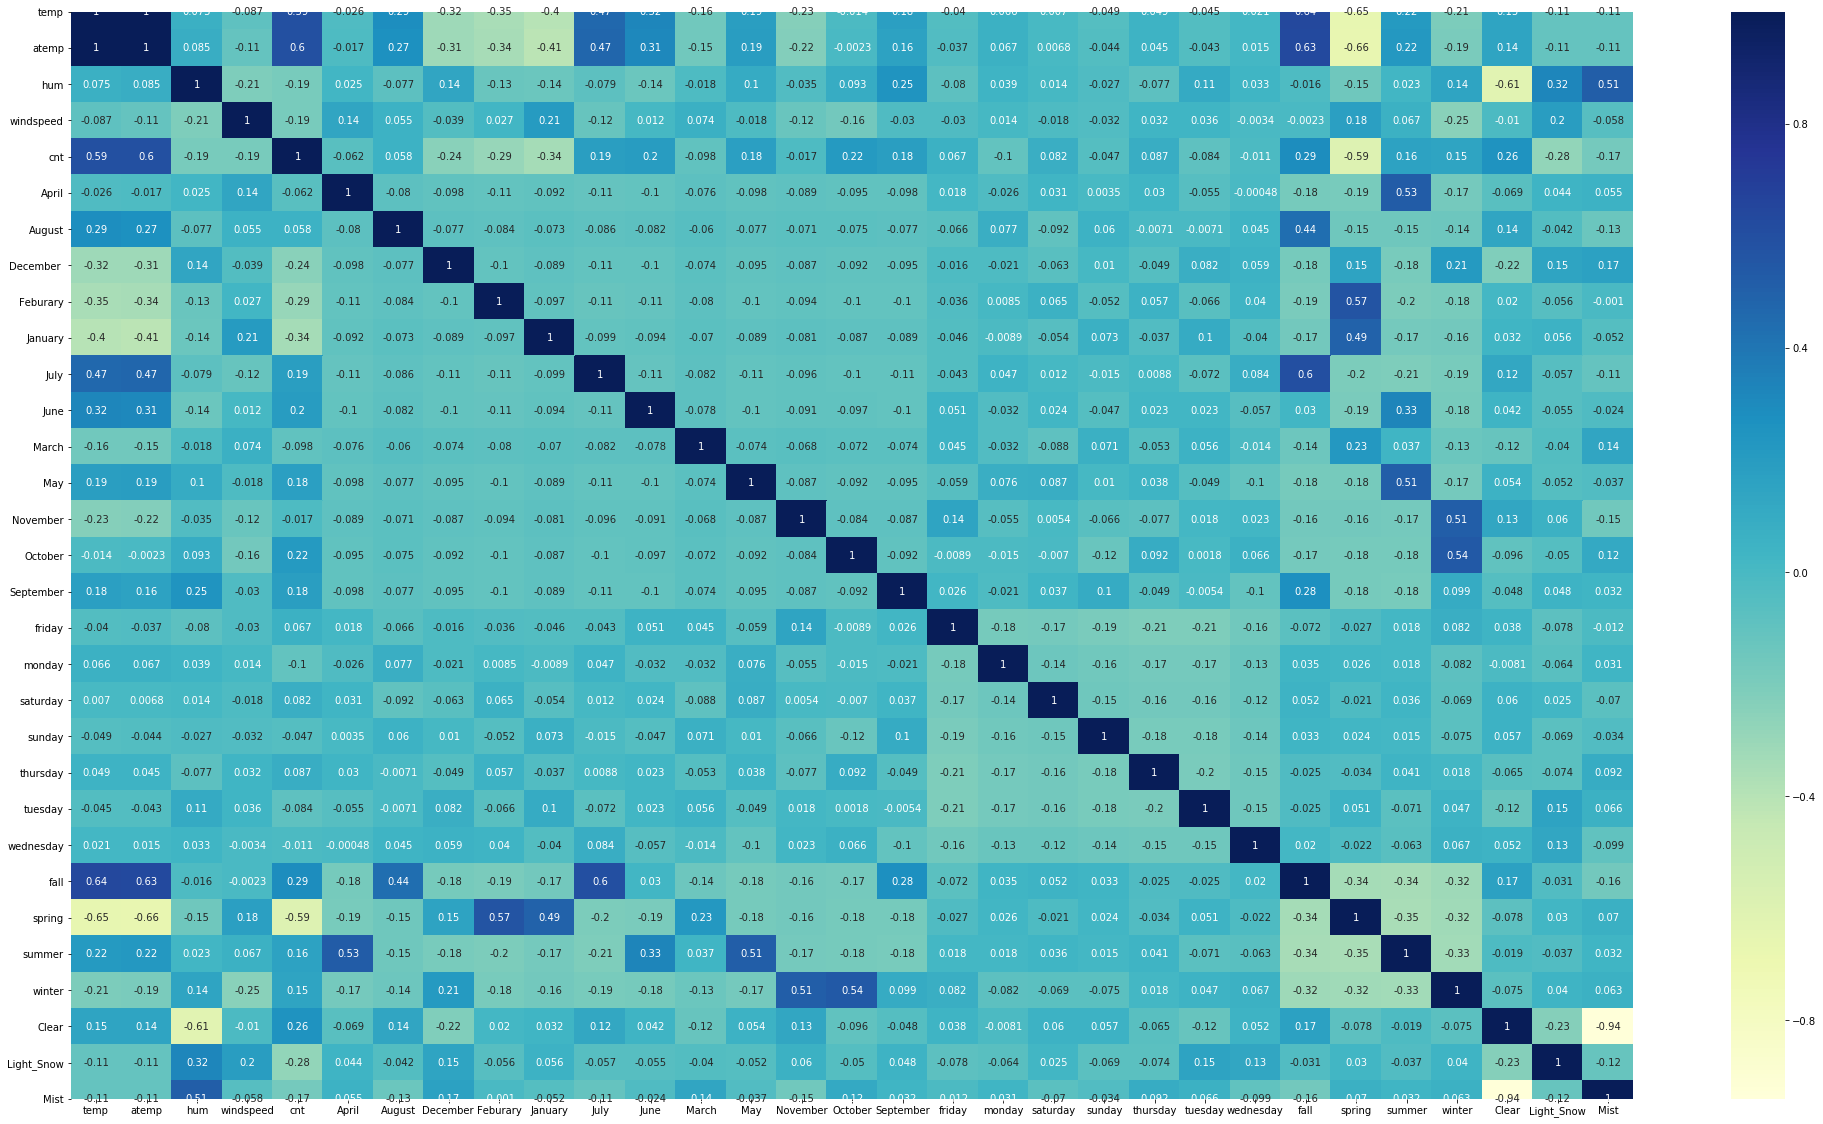

In [26]:
#checking correlation which variables high highest correlation
plt.figure(figsize = (35, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

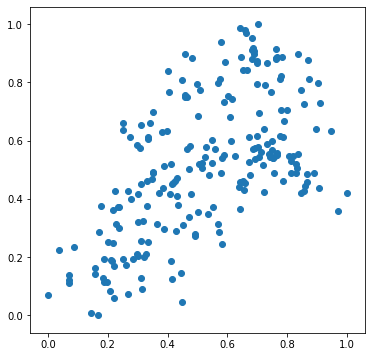

In [27]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

Here I'm taking "atemp" as the first variable.

### Dividing into X and Y sets of model building

In [28]:
y_train= df_train.pop('cnt')
x_train= df_train

## Step- 5 Bulding Linear Model

Going to use Mixed approach for it.

### RFE (Recursive Feature Elimination)

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(x_train, y_train)

In [31]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 10),
 ('workingday', True, 1),
 ('temp', False, 19),
 ('atemp', False, 18),
 ('hum', True, 1),
 ('windspeed', False, 17),
 ('April', False, 9),
 ('August', False, 5),
 ('December ', True, 1),
 ('Feburary', True, 1),
 ('January', True, 1),
 ('July', False, 4),
 ('June', True, 1),
 ('March', False, 8),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 7),
 ('September', False, 2),
 ('friday', False, 14),
 ('monday', False, 6),
 ('saturday', True, 1),
 ('sunday', False, 11),
 ('thursday', False, 16),
 ('tuesday', False, 12),
 ('wednesday', False, 15),
 ('fall', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('Clear', True, 1),
 ('Light_Snow', True, 1),
 ('Mist', False, 3)]

In [32]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'hum', 'December ', 'Feburary', 'January', 'June',
       'May', 'November', 'saturday', 'fall', 'spring', 'winter', 'Clear',
       'Light_Snow'],
      dtype='object')

In [33]:
x_train.columns[~rfe.support_]

Index(['holiday', 'temp', 'atemp', 'windspeed', 'April', 'August', 'July',
       'March', 'October', 'September', 'friday', 'monday', 'sunday',
       'thursday', 'tuesday', 'wednesday', 'summer', 'Mist'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [34]:
x_train_rfe = x_train[col]

In [35]:
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [36]:
lm = sm.OLS(y_train,x_train_rfe.astype(float)).fit()

In [37]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     70.40
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           8.64e-72
Time:                        22:34:23   Log-Likelihood:                 203.31
No. Observations:                 219   AIC:                            -374.6
Df Residuals:                     203   BIC:                            -320.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3742      0.042      8.990      0.0

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_rfe.astype(float)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,38.47
12,spring,5.03
13,winter,2.88
5,Feburary,2.60
6,January,2.28
11,fall,2.08
3,hum,2.04
14,Clear,1.89
8,May,1.62
4,December,1.57


`Hum` is insignificant in presence of other variables; can be dropped

In [39]:
x_train_new = x_train_rfe.drop(["hum"], axis = 1)

Rebuilding without "hum"

In [40]:
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_new)

In [41]:
lm = sm.OLS(y_train,x_train_lm.astype(float)).fit()

In [42]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     74.55
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           4.01e-72
Time:                        22:34:23   Log-Likelihood:                 201.77
No. Observations:                 219   AIC:                            -373.5
Df Residuals:                     204   BIC:                            -322.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3187      0.026     12.354      0.0

In [43]:
vif = pd.DataFrame()
x = x_train_lm.astype(float)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.64
11,spring,5.02
12,winter,2.84
4,Feburary,2.60
5,January,2.28
10,fall,2.06
3,December,1.57
7,May,1.57
2,workingday,1.53
8,November,1.53


Removing "saturday" and rebuilding the model

In [44]:
x_train_new_1= x_train_new.drop(["saturday"], axis = 1)

In [45]:
x_train_lm_2 = sm.add_constant(x_train_new_1)

In [46]:
lm = sm.OLS(y_train,x_train_lm_2.astype(float)).fit()

In [47]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     79.26
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.95e-72
Time:                        22:34:24   Log-Likelihood:                 200.16
No. Observations:                 219   AIC:                            -372.3
Df Residuals:                     205   BIC:                            -324.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3341      0.024     13.711      0.0

In [48]:
vif = pd.DataFrame()
x = x_train_lm_2.astype(float)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,12.93
10,spring,5.02
11,winter,2.84
4,Feburary,2.58
5,January,2.28
9,fall,2.06
3,December,1.57
7,May,1.57
8,November,1.53
6,June,1.32


Removing "workingday" and rebuilding the model

In [49]:
x_train_new_2= x_train_new_1.drop(["workingday"], axis = 1)

In [50]:
x_train_lm_3= sm.add_constant(x_train_new_2)

In [51]:
lm = sm.OLS(y_train,x_train_lm_3.astype(float)).fit()

In [52]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     84.29
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.50e-72
Time:                        22:34:25   Log-Likelihood:                 198.02
No. Observations:                 219   AIC:                            -370.0
Df Residuals:                     206   BIC:                            -326.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3566      0.022     16.361      0.0

In [53]:
vif = pd.DataFrame()
x = x_train_lm_3.astype(float)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.20
9,spring,5.02
10,winter,2.82
3,Feburary,2.58
4,January,2.27
8,fall,2.06
2,December,1.57
6,May,1.56
7,November,1.53
5,June,1.31


In [54]:
x_train_new_2.columns

Index(['const', 'yr', 'December ', 'Feburary', 'January', 'June', 'May',
       'November', 'fall', 'spring', 'winter', 'Clear', 'Light_Snow'],
      dtype='object')

In [55]:
x_train_new_3 =x_train_new_2.drop(['Feburary'], axis=1)
x_train_lm_4= sm.add_constant(x_train_new_3)

In [56]:
lm = sm.OLS(y_train,x_train_new_3.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     88.91
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           3.98e-72
Time:                        22:34:26   Log-Likelihood:                 194.54
No. Observations:                 219   AIC:                            -365.1
Df Residuals:                     207   BIC:                            -324.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3591      0.022     16.274      0.0

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_lm_4.astype(float)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.18
9,winter,2.77
8,spring,2.75
7,fall,2.05
5,May,1.56
6,November,1.50
3,January,1.40
4,June,1.31
2,December,1.29
10,Clear,1.17


In [58]:
x_train_new =x_train_new_3.drop(['May'], axis=1)
x_train_lm= sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_new.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     94.12
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.53e-71
Time:                        22:34:26   Log-Likelihood:                 190.64
No. Observations:                 219   AIC:                            -359.3
Df Residuals:                     208   BIC:                            -322.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3895      0.019     20.104      0.0

In [59]:
vif = pd.DataFrame()
x = x_train_lm.astype(float)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.60
8,winter,2.20
7,spring,2.13
6,fall,1.54
5,November,1.50
3,January,1.40
2,December,1.29
9,Clear,1.17
4,June,1.16
10,Light_Snow,1.11


In [60]:
x_train_new =x_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
x = x_train_new.astype(float)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Clear,2.46
6,spring,2.11
7,winter,2.09
0,yr,1.79
4,November,1.60
5,fall,1.56
2,January,1.52
1,December,1.41
3,June,1.13
9,Light_Snow,1.09


## Step-6 Residual Analysis of the train data

In [61]:
y_train_cnt = lm.predict(x_train_lm)

In [62]:
%matplotlib inline

Text(0.5, 0, 'Errors')

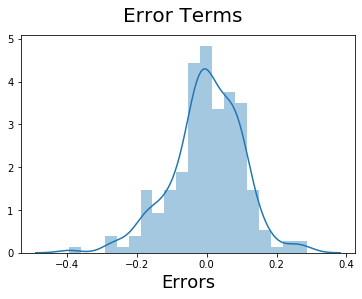

In [63]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

## Making Predictions

In [64]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,temp,atemp,hum,windspeed,cnt,April,August,December,Feburary,January,...,thursday,tuesday,wednesday,fall,spring,summer,winter,Clear,Light_Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000
mean,0.523197,0.509997,0.524774,0.427594,0.508597,0.078431,0.096078,0.084314,0.066667,0.088235,...,0.133333,0.131373,0.158824,0.262745,0.243137,0.245098,0.24902,0.627451,0.029412,0.343137
std,0.240815,0.222397,0.197076,0.199695,0.245431,0.269113,0.294988,0.278131,0.249689,0.283915,...,0.340268,0.338139,0.365870,0.440557,0.429398,0.430568,0.43287,0.483958,0.169124,0.475223
min,-0.049680,-0.027173,-0.353829,0.050346,-0.052678,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.312701,0.320566,0.373840,0.284596,0.336812,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.526669,0.524470,0.529292,0.399362,0.514081,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,0.734271,0.693736,0.665893,0.537768,0.695562,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000
max,1.016608,1.019965,0.997100,1.226426,1.040106,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [65]:
y_test = df_test.pop('cnt')
x_test = df_test

In [68]:
x_test_new = x_test[x_train_new.columns]

x_test_new = sm.add_constant(x_test_new.astype(float))


In [70]:
y_pred = lm.predict(x_test_new)
x_test_new

,const,yr,December,January,June,November,fall,spring,winter,Clear,Light_Snow
653,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
576,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
426,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
728,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
482,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
578,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
53,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
350,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Step-7  Model Evaluation

Text(0, 0.5, 'y_pred')

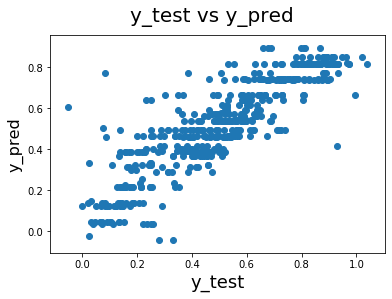

In [71]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

In [72]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test,y_pred = y_pred)

0.7484022102933817

As the R2 square for Train model and Test model is around 5% we can say that the buld model is good to go.